TDI Project - How to Predict Ted Talks views based on all features - including linguistic features? 


#### Source of Data: 
https://data.world/owentemple/ted-talks-complete-list

In [1]:
# Importing Necessary Packages and Libraries

import pandas as pd 
import seaborn as sns
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
%matplotlib inline

In [2]:
pwd

'/Users/rtmac/Data-Science/TDI/Project'

In [3]:
df = pd.read_csv("Data/TED_Talks_by_ID_plus-transcripts-and-LIWC-and-MFT-plus-views.csv")

In [4]:
df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 123 columns):
id                      2475 non-null int64
speaker                 2475 non-null object
headline                2475 non-null object
URL                     2475 non-null object
description             2475 non-null object
transcript_URL          2386 non-null object
month_filmed            2475 non-null int64
year_filmed             2475 non-null int64
event                   2475 non-null object
duration                2475 non-null object
date_published          2475 non-null object
views_as_of_06162017    2474 non-null float64
tags                    2475 non-null object
transcript              2386 non-null object
notes                   4 non-null object
WC                      2386 non-null float64
Analytic                2386 non-null float64
Clout                   2386 non-null float64
Authentic               2386 non-null float64
Tone                    2386 non-null 

In [5]:
def display_all(data):
    with pd.option_context("display.max_rows", 10000, "display.max_columns", 10000): 
        display(data)

In [6]:
display_all(df.iloc[:5].T)

,0,1,2,3,4
id,1,2,3,4,5
speaker,Al Gore,Amy Smith,Ashraf Ghani,Burt Rutan,Chris Bangle
headline,Averting the climate crisis,Simple designs to save a life,How to rebuild a broken state,The real future of space exploration,Great cars are great art
URL,http://www.ted.com/talks/view/id/1,http://www.ted.com/talks/view/id/2,http://www.ted.com/talks/view/id/3,http://www.ted.com/talks/view/id/4,http://www.ted.com/talks/view/id/5
description,With the same humor and humanity he exuded in ...,Fumes from indoor cooking fires kill more than...,Ashraf Ghani's passionate and powerful 10-minu...,"In this passionate talk, legendary spacecraft ...",American designer Chris Bangle explains his ph...
transcript_URL,http://www.ted.com/talks/view/id/1/transcript?...,http://www.ted.com/talks/view/id/2/transcript?...,http://www.ted.com/talks/view/id/3/transcript?...,http://www.ted.com/talks/view/id/4/transcript?...,http://www.ted.com/talks/view/id/5/transcript?...
month_filmed,2,2,7,2,2
year_filmed,2006,2006,2005,2006,2002
event,TED2006,TED2006,TEDGlobal 2005,TED2006,TED2002
duration,0:16:17,0:15:06,0:18:45,0:19:37,0:20:04


### Basic Data Wrangling  

Column "Notes" have the most NaN values (just 4 non null). Since this column does not provide us so much information so let's drop it at all. 

In [7]:
df = df.drop('notes', axis=1)

In [8]:
df_null = df[df.isnull().any(axis=1)]

print (df_null.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 21 to 2416
Columns: 122 entries, id to morality_general
dtypes: float64(109), int64(3), object(10)
memory usage: 85.5+ KB
None


In [9]:
display_all(df_null.T)

,21,120,148,163,235,254,393,441,468,506,541,580,581,582,589,590,591,595,600,601,602,608,624,630,639,642,650,656,667,673,689,699,739,747,757,767,793,835,943,949,1017,1034,1037,1046,1060,1067,1068,1081,1088,1089,1095,1096,1105,1106,1107,1112,1113,1119,1127,1134,1135,1141,1145,1150,1156,1170,1172,1173,1174,1175,1179,1180,1186,1192,1194,1200,1213,1224,1231,1238,1306,1317,1351,1431,1470,1488,1677,2410,2416
id,24,138,169,186,265,290,478,541,581,631,672,720,721,722,730,732,733,737,745,746,747,756,775,784,795,798,806,816,832,840,857,870,923,931,943,953,982,1038,1151,1157,1225,1242,1245,1254,1268,1278,1279,1292,1299,1300,1306,1307,1316,1317,1318,1324,1325,1331,1340,1347,1348,1354,1358,1363,1369,1383,1385,1386,1387,1388,1392,1393,1400,1406,1408,1415,1428,1439,1446,1453,1528,1543,1578,1662,1705,1723,1923,2710,2717
speaker,Pilobolus,Ethel,Vusi Mahlasela,Rokia Traore,Rokia Traore,Sxip Shirey + Rachelle Garniez,Eric Lewis,Eric Lewis,Qi Zhang,Vishal Vaid,Matthew White,Steve Jobs,Michael Sandel,Cat Laine,Randy Pausch,Robert Sapolsky,Matt Weinstein,Edwidge Danticat,Sivamani,Richard Dawkins,Taylor Mali,JK Rowling,Bobby McFerrin,Richard Feynman,Gary Vaynerchuk,Douglas Adams,Patsy Rodenburg,Jesse Schell,Eric Whitacre,Tim Birkhead,Viktor Frankl,Sophie Hunger,Jeff Bezos,Diane J. Savino,Jeremy Rifkin,Seth Godin,Joel Burns,Ken Robinson,Improv Everywhere,Malcolm McLaren,Sasha Dichter,Paul Lewis,Michael Nielsen,Iain McGilchrist,Roger McNamee,Gabe Zichermann,Natalie Warne,Leslie Dodson,Klaus Stadlmann,David Damberger,Roger Doiron,Thomas Pogge,Nate Garvis,Michelle Borkin,Tyler Cowen,Kirk Sorensen,Charles Hazlewood + British Paraorchestra,Scott Rickard,Bjarke Ingels,Nancy Duarte,Aleph Molinari,Keith Nolan,Inara George,Lucianne Walkowicz,Jeffrey Kluger,Kelli Anderson,Greg Gage,Chris Anderson (TED),David Gallo,Adam Savage,Scott Summit,Mark Raymond,Jer Thorp,Daniel Schnitzer,Tierney Thys + Plankton Chronicles Project,Carvens Lissaint,Jon Bergmann,Rick Guidotti,JosÃ© Bowen,Melissa Garren,Giles Duley,Hannah Fry,John Lloyd,Kid President,Katherine Kuchenbecker,Michael Stevens,Clayton Cameron,Silk Road Ensemble,Sō Percussion
headline,"A dance of ""Symbiosis""","A string quartet plays ""Blue Room""","""Woza""","""M'Bifo""","""Kounandi""","A performance with breath, music, passion",Piano jazz that rocks,Chaos and harmony on piano,An electrifying organ performance,Hypnotic South Asian improv music,The modern euphonium,How to live before you die,What's the right thing to do?,Engineering a better life for all,Really achieving your childhood dreams,The uniqueness of humans,What Bernie Madoff couldn't steal from me,Stories of Haiti,"Rhythm is everything, everywhere",Growing up in the universe,What teachers make,The fringe benefits of failure,Watch me play ... the audience!,Physics is fun to imagine,Do what you love (no excuses!),"Parrots, the universe and everything",Why I do theater,When games invade real life,A choir as big as the Internet,The early birdwatchers,Why believe in others,Songs of secrets and city lights,What matters more than your talents,The case for same-sex marriage,The empathic civilization,This is broken,A message to gay teens: It gets better,Changing education paradigms,Gotta share!,Authentic creativity vs. karaoke culture,The Generosity Experiment,How mobile phones helped solve two murders,Open science now!,The divided brain,6 ways to save the internet,How games make kids smarter,Being young and making an impact,Don't misrepresent Africa,The world's smallest 3D printer,What happens when an NGO admits failure,My subversive (garden) plot,Medicine for the 99 percent,"Change our culture, change our world",Can astronomers help doctors?,Be suspicious of simple stories,"Thorium, an alternative nuclear fuel",The debut of the British Paraorchestra,The beautiful math behind the world's ugliest ...,Hedonistic sustainability,The secret structure of great talks,Let's bridge the digital divide!,Deaf in the military,"""Family Tree""",Look up for a change,The sibl

All NaN values of any other column are in the same rows (total 89 entries) so the wise choice can be drop this 89 rows all together.

In [10]:
# delete NaN values of entire dataset

df = df.dropna()
print (df.info(df.info(verbose = True, null_counts = True)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2386 entries, 0 to 2474
Data columns (total 122 columns):
id                      2386 non-null int64
speaker                 2386 non-null object
headline                2386 non-null object
URL                     2386 non-null object
description             2386 non-null object
transcript_URL          2386 non-null object
month_filmed            2386 non-null int64
year_filmed             2386 non-null int64
event                   2386 non-null object
duration                2386 non-null object
date_published          2386 non-null object
views_as_of_06162017    2386 non-null float64
tags                    2386 non-null object
transcript              2386 non-null object
WC                      2386 non-null float64
Analytic                2386 non-null float64
Clout                   2386 non-null float64
Authentic               2386 non-null float64
Tone                    2386 non-null float64
WPS                     2386 non-n

<br>

Our final clean dataset has *** 2386 rows and 122 columns***


<br>

Now I am gonna change types and formats of some columns, and later will extract new columns from excisting columns:

In [11]:
#### 'date_published' column is converted to datetime type

df['date_published'].head(10)

df['date_published'] = pd.to_datetime(df['date_published'], format='%m/%d/%y')

In [12]:
# change the type of "duration" column from string to total seconds (int)

def get_seconds(t):
    h,m,s = t.split(':')
    return int(datetime.timedelta(hours=int(h),minutes=int(m),seconds=int(s)).total_seconds())

df['duration'] = df['duration'].apply(lambda x: get_seconds(x))

### Basic Data Exploration

In [13]:
display_all(df.describe())

,id,month_filmed,year_filmed,duration,views_as_of_06162017,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,WC2,WPS.1,Sixltr.1,Dic.1,harm_virtue,harm_vice,fairness_virtue,fairness_vice,ingroup_virtue,ingroup_vice,authority_virtue,authority_vice,purity_virtue,purity_vice,morality_general
count,2386.000000,2386.000000,2386.000000,2386.000000,2.386000e+03,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.00000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.00000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.00000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000
mean,1445.886002,5.529338,2011.391869,823.878458,1.695917e+06,2125.786253,55.908776,74.071697,39.109392,53.076253,17.09500,17.260532,84.054983,53.638386,15.545930,8.411920,2.671073,2.107234,1.796299,0.729560,1.107758,7.125750,7.153500,12.928114,8.709099,5.685478,7.059480,1.240616,15.883701,4.045604,2.233152,1.881873,5.162297,2.304061,4.021174,2.735369,1.234786,0.225440,0.316781,0.234384,10.015117,0.273386,0.163910,0.476936,0.718797,11.260503,2.418470,1.954690,1.439874,2.440989,1.36246,3.005545,2.715612,1.205423,0.961081,0.384216,1.764832,0.576018,0.748424,0.101710,0.328592,7.767871,3.03552,1.433324,2.274028,1.168642,0.471450,3.739308,10.861576,1.074606,13.206903,2.014531,7.073261,4.299183,2.450235,0.918764,0.279145,0.640210,0.184899,0.176945,0.458215,0.033315,0.077024,0.155838,0.184878,0.011706,20.065448,5.762519,6.653944,1.958860,0.079216,0.495935,0.051144,0.501710,0.773516,2.634568,1.064267,0.089388,2135.735960,17.169761,17.072909,1.105683,0.106002,0.117888,0.041400,0.014719,0.241660,0.043177,0.206236,0.013386,0.034376,0.051748,0.235151
std,805.258266,3.429215,3.532930,336.791926,2.444475e+06,973.665262,17.020147,13.129521,17.407064,20.312990,7.98996,3.268534,5.946088,5.193677,2.984395,2.504406,2.070716,1.216745,1.124728,0.922213,0.708050,1.742769,1.431139,1.822967,1.567315,1.318581,1.372943,0.558016,2.532263,1.022431,0.734320,0.625710,4.529673,0.701412,1.460428,1.111984,0.828877,0.280159,0.396095,0.241475,2.920920,0.437001,0.195645,0.844198,0.886482,2.352167,0.896578,0.715104,0.607617,0.860141,0.49615,0.869823,1.547716,0.844975,1.301523,0.349141,1.393845,0.679534,0.880724,0.284713,0.552901,2.103031,1.38736,0.692760,0.997876,0.522112,0.385855,1.782438,2.523718,0.522883,2.398490,0.741624,1.699618,1.231778,1.497484,1.295433,0.315605,0.837515,0.420725,0.324

As you would see there are so many features (122). So as the first step let's just focus on some of the most known ones. 

Based on the dictionary of the dataset, I focused on these features right now: 

*** id, event, duration, date_published, tags, month_filmed, year_filmed, views_as_of_06162017, WC, Analytic, Clout, Authentic, Tone, WPS, and days_on_platform (which will be added later by myself)***



Number of views (views_as_of_06162017) has a very wide range of entires (from 139000 - 45600000) . So I used np.log10 to make its analysis and plots more meaningful. 

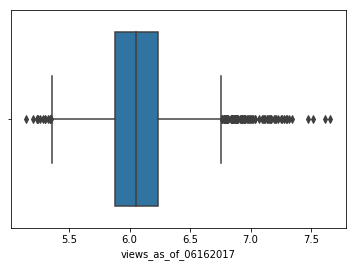

In [14]:
sns.boxplot(np.log10(df['views_as_of_06162017']))

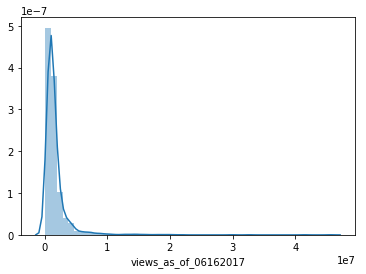

In [15]:
sns.distplot(df['views_as_of_06162017'], kde=True)

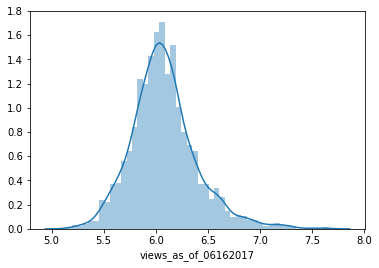

In [16]:
sns.distplot(np.log10(df['views_as_of_06162017']),norm_hist=True, kde=True)

### Feature Engineering 

In [17]:
# Add new column as "days_on_platform" 

end_time = pd.to_datetime('06/16/17', format='%m/%d/%y')
df['days_on_platform'] = end_time - df['date_published']

In [18]:
print (df['days_on_platform'].head())

0   4007 days
1   3958 days
2   3894 days
3   3887 days
4   3725 days
Name: days_on_platform, dtype: timedelta64[ns]


In [19]:
# Change its type to integer 

df['days_on_platform'] = df['days_on_platform'].dt.days.astype(int)

In [20]:
# Add two new column as 'month_published and year_published' 

df['month_published'] = df['date_published'].dt.month
df['year_published'] = df['date_published'].dt.year

In [21]:
# Add new colomn as "view_per_day" 

df['view_per_day'] = np.divide(df['views_as_of_06162017'], df['days_on_platform'] ) 

In [22]:
# Recheck all columns and their types 

print (df.info(df.info(verbose = True, null_counts = True)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2386 entries, 0 to 2474
Data columns (total 126 columns):
id                      2386 non-null int64
speaker                 2386 non-null object
headline                2386 non-null object
URL                     2386 non-null object
description             2386 non-null object
transcript_URL          2386 non-null object
month_filmed            2386 non-null int64
year_filmed             2386 non-null int64
event                   2386 non-null object
duration                2386 non-null int64
date_published          2386 non-null datetime64[ns]
views_as_of_06162017    2386 non-null float64
tags                    2386 non-null object
transcript              2386 non-null object
WC                      2386 non-null float64
Analytic                2386 non-null float64
Clout                   2386 non-null float64
Authentic               2386 non-null float64
Tone                    2386 non-null float64
WPS                     238

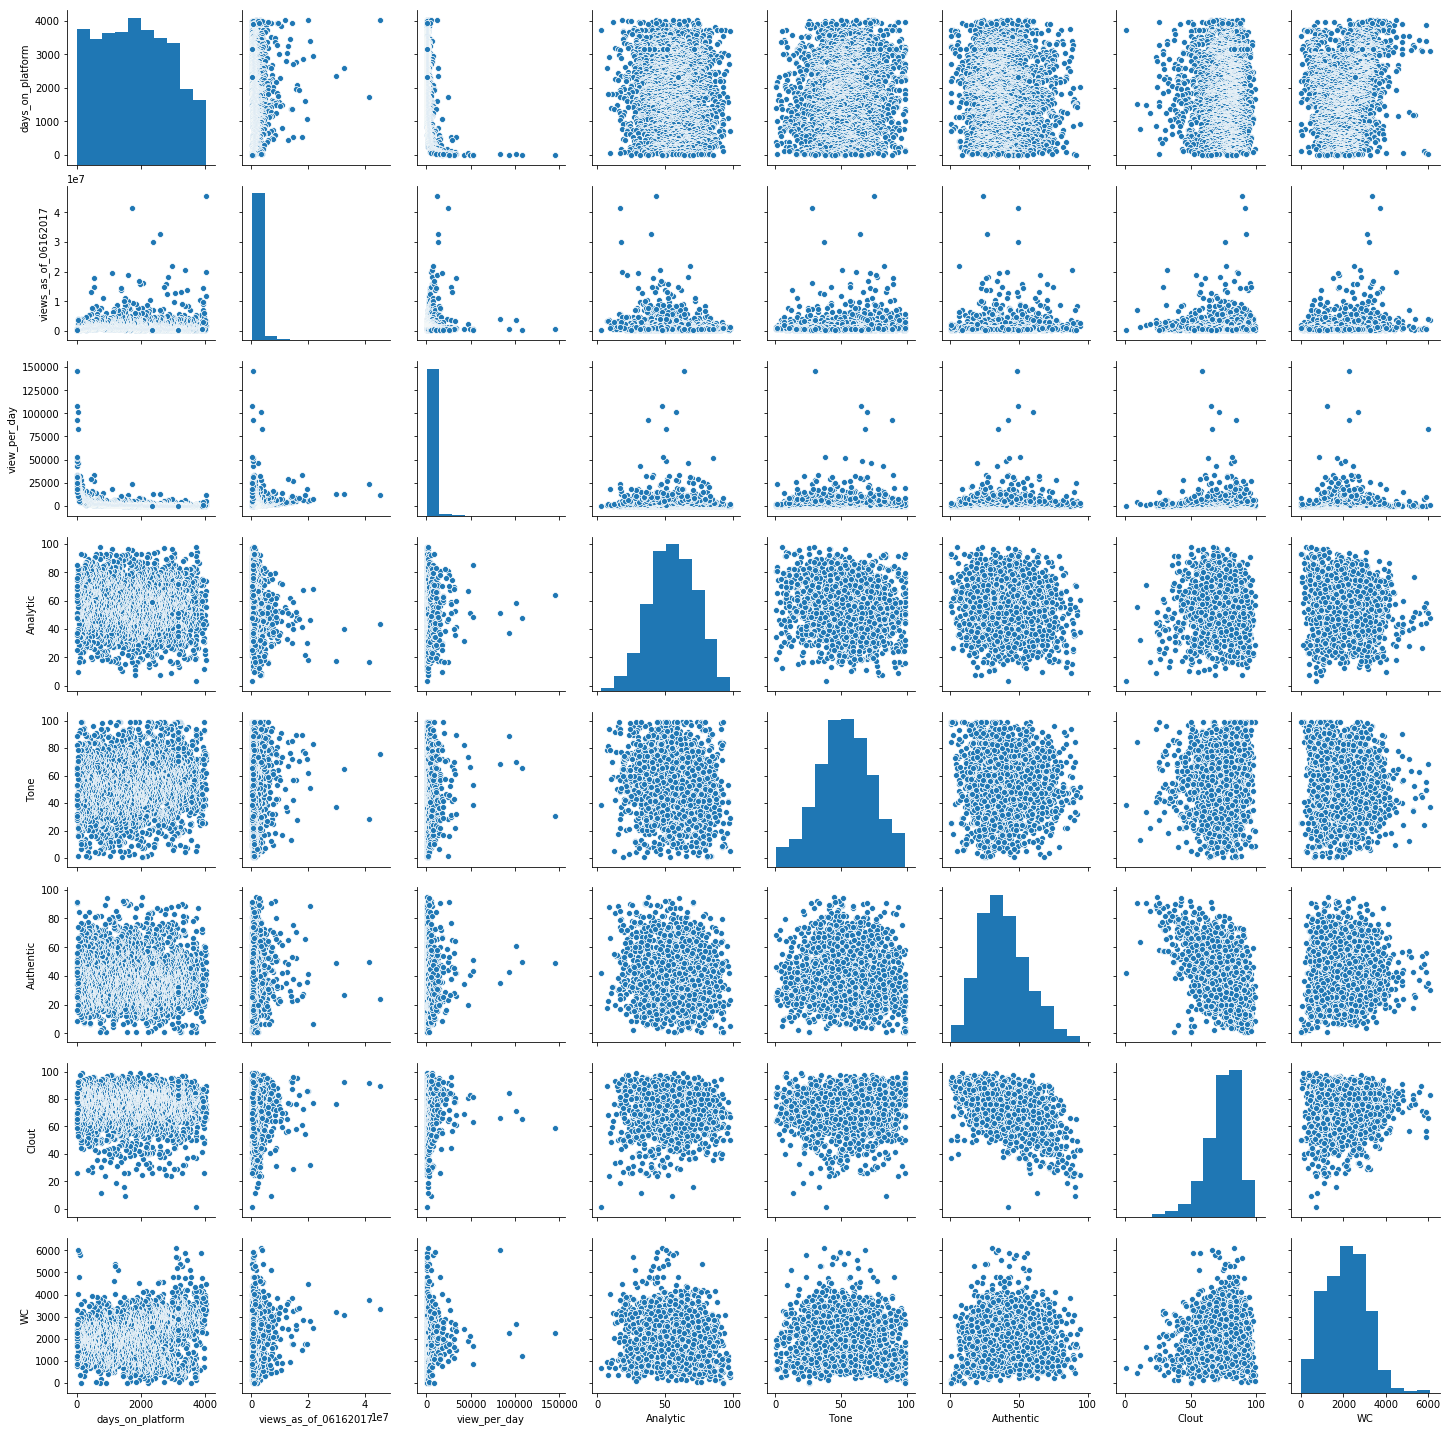

In [23]:
sns.pairplot(df, vars=['days_on_platform','views_as_of_06162017','view_per_day' , 'Analytic','Tone','Authentic','Clout','WC'])
plt.show()

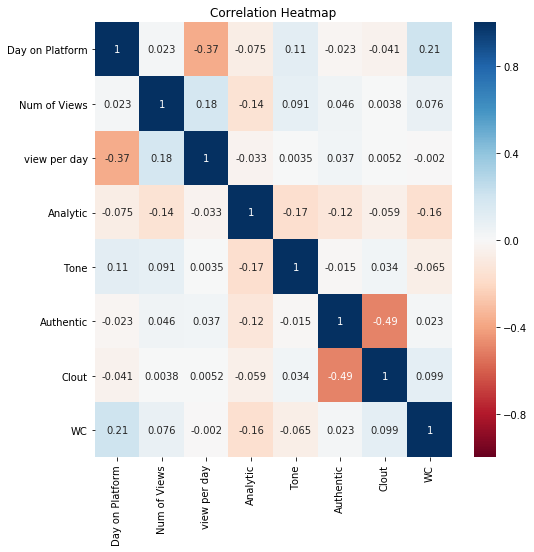

In [24]:
corr_data = df[['days_on_platform','views_as_of_06162017','view_per_day' , 'Analytic','Tone','Authentic','Clout','WC']]
corr = corr_data.corr()

# plot the heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(corr,cmap="RdBu",annot=True,xticklabels=['Day on Platform','Num of Views','view per day','Analytic','Tone','Authentic','Clout','WC'], yticklabels=['Day on Platform','Num of Views','view per day','Analytic','Tone','Authentic','Clout','WC'],vmin=1,vmax=-1)
plt.title("Correlation Heatmap")
plt.show()

<br>

Now, let's focus on some important feature of the entire dataset. I made the new dataset **df_lim** to make it easier to follow for myself. 

<br>

In [25]:
df_lim = df.loc[:,['id','event','duration','tags','month_filmed','year_filmed','date_published','days_on_platform','views_as_of_06162017','view_per_day' , 'Analytic','Tone','Authentic','Clout','WC','WPS']].copy()

df_lim.head(6)

,id,event,duration,tags,month_filmed,year_filmed,date_published,days_on_platform,views_as_of_06162017,view_per_day,Analytic,Tone,Authentic,Clout,WC,WPS
0,1,TED2006,977,"cars,alternative energy,culture,politics,scien...",2,2006,2006-06-27,4007,3177001.0,792.862740,66.79,71.09,43.31,75.31,2281.0,15.62
1,2,TED2006,906,"MacArthur grant,simplicity,industrial design,a...",2,2006,2006-08-15,3958,1379328.0,348.491157,45.13,54.50,19.05,78.94,2687.0,16.79
2,3,TEDGlobal 2005,1125,"corruption,poverty,economics,investment,milita...",7,2005,2006-10-18,3894,790536.0,203.013867,74.47,35.53,27.20,65.67,2506.0,15.57
3,4,TED2006,1177,"aircraft,flight,industrial design,NASA,rocket ...",2,2006,2006-10-25,3887,1985119.0,510.707229,46.11,61.34,70.27,71.00,3092.0,16.10
4,5,TED2002,1204,"cars,industrial design,transportation,inventio...",2,2002,2007-04-05,3725,859487.0,230.734765,38.48,66.80,44.92,81.00,3781.0,17.67
5,6,TEDGlobal 2005,1011,"biotech,invention,oceans,genetics,DNA,biology,...",7,2005,2007-04-05,3725,555826.0,149.215034,75.96,42.88,34.22,75.89,2548.0,21.78


In [26]:
df_lim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2386 entries, 0 to 2474
Data columns (total 16 columns):
id                      2386 non-null int64
event                   2386 non-null object
duration                2386 non-null int64
tags                    2386 non-null object
month_filmed            2386 non-null int64
year_filmed             2386 non-null int64
date_published          2386 non-null datetime64[ns]
days_on_platform        2386 non-null int64
views_as_of_06162017    2386 non-null float64
view_per_day            2386 non-null float64
Analytic                2386 non-null float64
Tone                    2386 non-null float64
Authentic               2386 non-null float64
Clout                   2386 non-null float64
WC                      2386 non-null float64
WPS                     2386 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(5), object(2)
memory usage: 316.9+ KB


In [27]:
df_lim.describe()

,id,duration,month_filmed,year_filmed,days_on_platform,views_as_of_06162017,view_per_day,Analytic,Tone,Authentic,Clout,WC,WPS
count,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2.386000e+03,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.00000
mean,1445.886002,823.878458,5.529338,2011.391869,1824.626991,1.695917e+06,2328.556473,55.908776,53.076253,39.109392,74.071697,2125.786253,17.09500
std,805.258266,336.791926,3.429215,3.532930,1072.940792,2.444475e+06,6417.535936,17.020147,20.312990,17.407064,13.129521,973.665262,7.98996
min,1.000000,135.000000,1.000000,1984.000000,3.000000,1.389150e+05,54.322222,3.150000,1.000000,1.000000,1.000000,6.000000,5.67000
25%,768.250000,579.250000,2.000000,2009.000000,926.250000,7.560805e+05,346.968199,43.822500,39.702500,25.990000,67.415000,1399.000000,14.29000
50%,1488.500000,856.000000,5.000000,2012.000000,1815.500000,1.125707e+06,792.867887,55.875000,52.845000,37.165000,76.500000,2129.500000,16.41500
75%,2140.750000,1053.000000,9.000000,2014.000000,2675.750000,1.702883e+06,2091.879239,68.247500,67.327500,50.155000,83.090000,2813.750000,18.86750
max,2804.000000,3608.000000,12.000000,2017.000000,4007.000000,4.562291e+07,145500.250000,98.180000,99.000000,94.590000,99.000000,6088.000000,257.00000


In [28]:
df['tags'] = df['tags'].apply (lambda x : x.lower())

In [29]:
df['tags'].iloc[:5]

0    cars,alternative energy,culture,politics,scien...
1    macarthur grant,simplicity,industrial design,a...
2    corruption,poverty,economics,investment,milita...
3    aircraft,flight,industrial design,nasa,rocket ...
4    cars,industrial design,transportation,inventio...
Name: tags, dtype: object

In [30]:
df['list_tags'] = df['tags'].apply(lambda x : [word for word in x.split(',')])

In [31]:
print (df['list_tags'].head(5))


0    [cars, alternative energy, culture, politics, ...
1    [macarthur grant, simplicity, industrial desig...
2    [corruption, poverty, economics, investment, m...
3    [aircraft, flight, industrial design, nasa, ro...
4    [cars, industrial design, transportation, inve...
Name: list_tags, dtype: object


technology       692
science          520
global issues    483
culture          470
design           399
tedx             398
business         329
entertainment    285
health           226
innovation       209
education        206
art              204
society          201
social change    198
politics         183
communication    183
future           179
creativity       174
biology          171
humanity         163
dtype: int64
<class 'pandas.core.series.Series'>


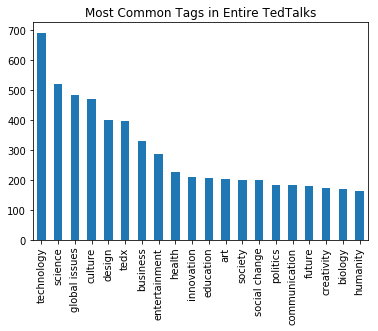

In [32]:
# Let's check common and rare words : 

freq_tags = pd.Series(','.join(df['tags']).split(',')).value_counts()
top_tags = freq_tags[:20]
print (top_tags)
print (type(top_tags))
plt.title("Most Common Tags in Entire TedTalks")
top_tags.plot.bar()

Text(0.5,1,'Boxplot of Main Summary Variables')

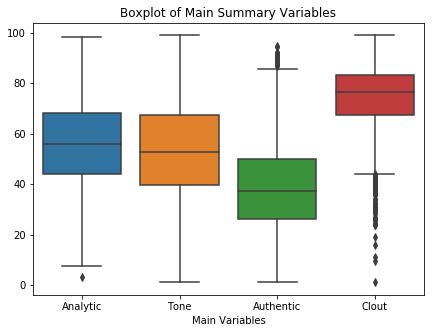

In [33]:
# Analyze 4 main summary features ("Analytic","Clout","Tone","Authentic")

plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df.loc[:,['Analytic','Tone','Authentic','Clout']]))
plt.ylabel("")
plt.xlabel("Main Variables")
plt.title("Boxplot of Main Summary Variables Entire Ted Talks")

Text(0.5,1,'Boxplot View Per Day')

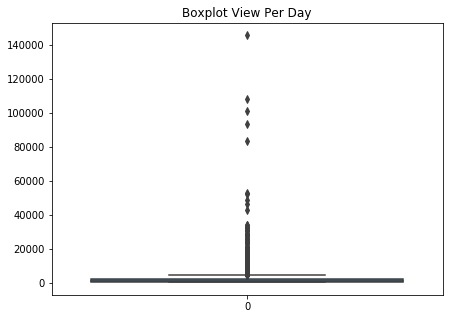

In [34]:
# View Per Day Exploration 

plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df['view_per_day'])
plt.ylabel("")
plt.xlabel("")
plt.title("Boxplot View Per Day")

There is a very wide range of ** Views per Day ** So let's see if we have something common amongst these data. 



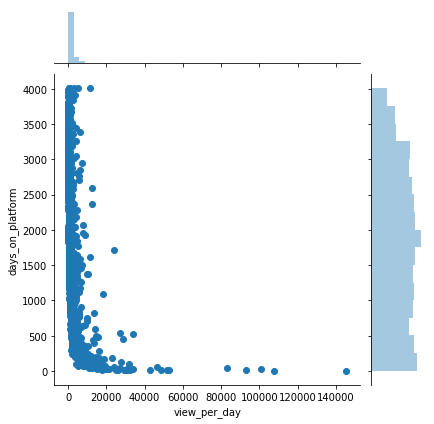

In [35]:
ax = sns.jointplot(x="view_per_day", y="days_on_platform", data=df)


Text(0.5,0,'View Per Day(log)')

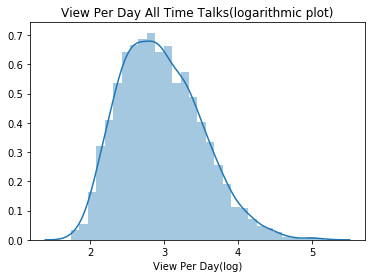

In [36]:
sns.distplot(np.log10(df['view_per_day']),norm_hist=True)
plt.title("View Per Day All Time Talks(logarithmic plot)")
plt.xlabel("View Per Day(log)")

Text(0.5,0,'Days on Platform')

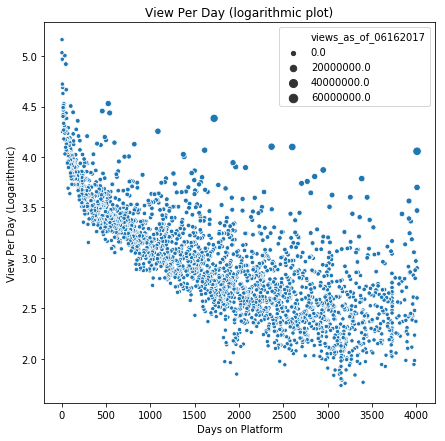

In [37]:
plt.figure(figsize=(7, 7))
sns.scatterplot(y=np.log10(df['view_per_day']) , x="days_on_platform", size="views_as_of_06162017", data=df,ci=95,y_jitter=.03 )

plt.title("View Per Day (logarithmic plot)")
plt.ylabel("View Per Day (Logarithmic)")
plt.xlabel("Days on Platform")


Text(0.5,0,'Days on Platform')

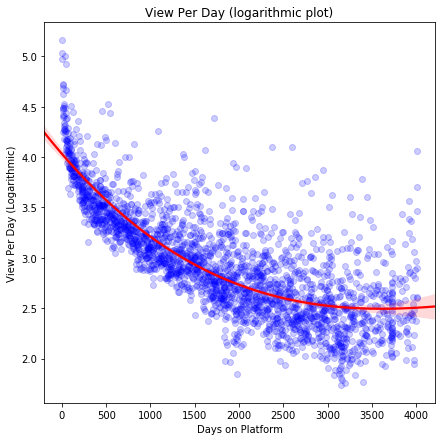

In [38]:
plt.figure(figsize=(7, 7))
ax = sns.regplot(y=np.log10(df['view_per_day']) , x="days_on_platform", data=df,ci=95, order=3,scatter_kws={"color": "blue","alpha":0.2}, line_kws={"color": "red"})

plt.title("View Per Day (logarithmic plot)")
plt.ylabel("View Per Day (Logarithmic)")
plt.xlabel("Days on Platform")


/Users/rtmac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


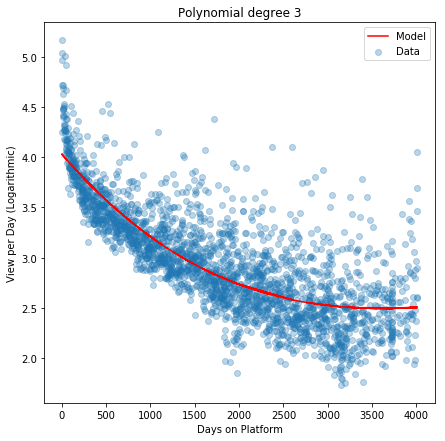

In [39]:

x= df['days_on_platform']
y= np.log10(df['view_per_day'])
model_1 = make_pipeline(PolynomialFeatures(degree = 3),LinearRegression())
model_1.fit(x.values.reshape(-1,1),y)
plt.figure(figsize = (7,7))
plt.scatter(x,y, alpha = .3, label = 'Data')
plt.plot(x,model_1.predict(x.reshape(-1,1)), color = 'red', label = 'Model')
plt.title('Polynomial degree 3')
plt.xlabel('Days on Platform')
plt.ylabel('View per Day (Logarithmic)')
plt.legend()
plt.show()

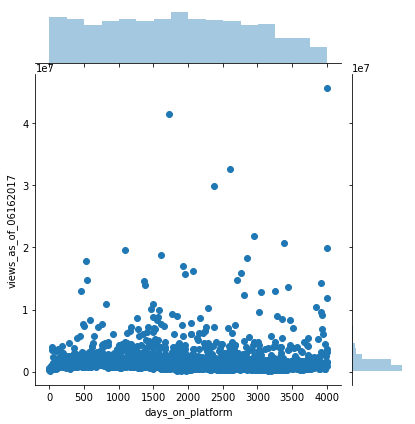

In [40]:
sns.jointplot(x="days_on_platform", y="views_as_of_06162017", data=df)

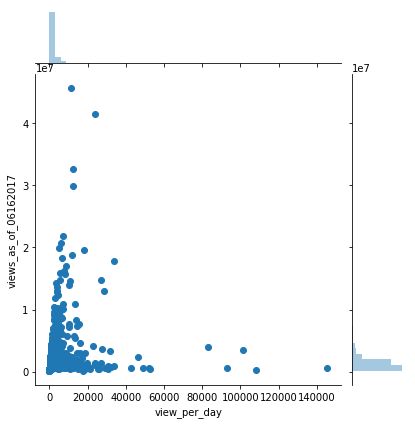

In [41]:
sns.jointplot(x="view_per_day", y="views_as_of_06162017", data=df)

So as we may observe, there should be ** Release effect ** we can tailor our talks in a good way. so let's just check the ** Just released talks **. 

## "Just Released Talks" (First 100 Days)

In [42]:
df_100days = df[df['days_on_platform']<=100].copy()

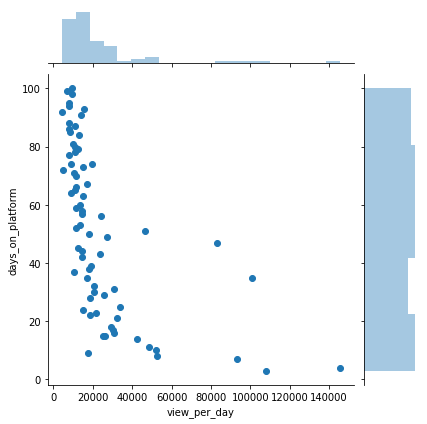

In [43]:
# Early realese effect - first 100 days

sns.jointplot(x="view_per_day", y="days_on_platform", data=df_100days)

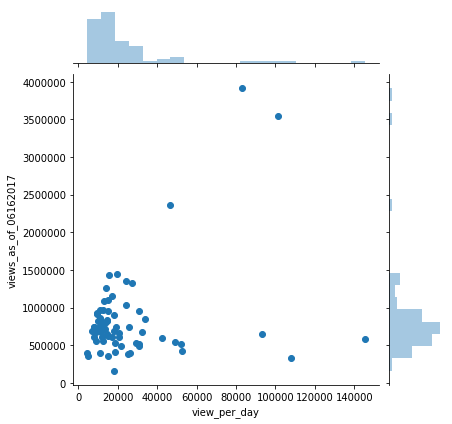

In [44]:
# Early realese effect - first two weeks 

sns.jointplot(x="view_per_day", y="views_as_of_06162017", data=df_100days)

Text(0.5,0,'View Per Day(log)')

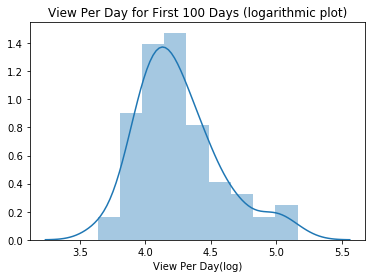

In [45]:
sns.distplot(np.log10(df_100days['view_per_day']),norm_hist=True)
plt.title("View Per Day for First 100 Days (logarithmic plot)")
plt.xlabel("View Per Day(log)")

society            38
humanity           33
communication      32
social change      27
tedx               23
technology         19
health             18
personal growth    18
leadership         17
education          16
children           16
science            15
community          15
future             14
identity           13
innovation         13
collaboration      13
global issues      12
inequality         12
health care        11
dtype: int64
<class 'pandas.core.series.Series'>


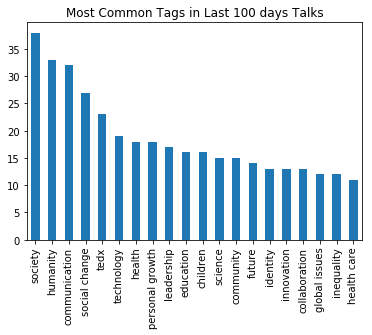

In [46]:
# Let's check common and rare words for the 100 first day released : 

freq_tags_100days = pd.Series(','.join(df_100days['tags']).split(',')).value_counts()
top_tags_100days = freq_tags_100days[:20]
print (top_tags_100days)
print (type(top_tags_100days))
plt.title("Most Common Tags in Last 100 days Talks")
top_tags_100days.plot.bar()

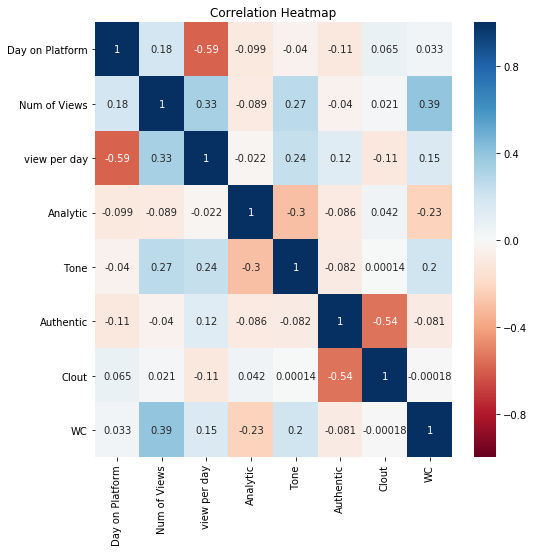

In [47]:
corr_data_100days = df_100days[['days_on_platform','views_as_of_06162017','view_per_day' , 'Analytic','Tone','Authentic','Clout','WC']]
corr = corr_data_100days.corr()

# plot the heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(corr,cmap="RdBu",annot=True,xticklabels=['Day on Platform','Num of Views','view per day','Analytic','Tone','Authentic','Clout','WC'], yticklabels=['Day on Platform','Num of Views','view per day','Analytic','Tone','Authentic','Clout','WC'],vmin=1,vmax=-1)
plt.title("Correlation Heatmap")
plt.show()

Text(0.5,1,'Boxplot of Main Summary Variables in Last 100 Days Talks')

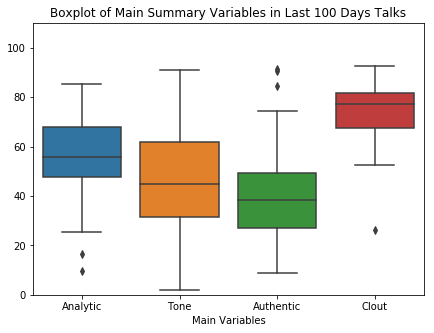

In [48]:
# Analyze 4 main summary features ("Analytic","Clout","Tone","Authentic")

plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_100days.loc[:,['Analytic','Tone','Authentic','Clout']]))
plt.ylabel("")
plt.xlabel("Main Variables")
plt.ylim(0,110)
plt.title("Boxplot of Main Summary Variables in Last 100 Days Talks")

## Most watched Ted Talks 

In [49]:
# Top 200 Ted Talks of all time (almsot 10%)
df_200top = df.nlargest(200, 'views_as_of_06162017').copy()

Text(0,0.5,'Views as of June 2017')

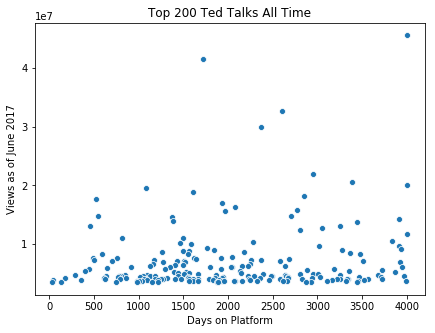

In [50]:
plt.figure(figsize=(7, 5))
sns.scatterplot( x="days_on_platform", y="views_as_of_06162017", data=df_200top)

plt.title('Top 200 Ted Talks All Time')
plt.xlabel('Days on Platform')
plt.ylabel('Views as of June 2017')

Text(0.5,0,'View Per Day(log)')

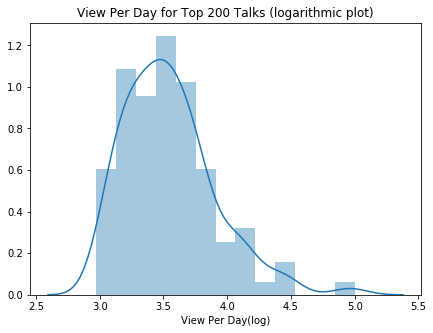

In [51]:
plt.figure(figsize=(7, 5))
sns.distplot(np.log10(df_200top['view_per_day']),norm_hist=True)
plt.title("View Per Day for Top 200 Talks (logarithmic plot)")
plt.xlabel("View Per Day(log)")

culture          74
technology       46
entertainment    38
business         38
science          36
psychology       31
tedx             27
brain            26
education        25
global issues    24
design           21
happiness        20
health           19
humor            18
work             18
creativity       16
mental health    14
success          13
mind             12
love             12
dtype: int64


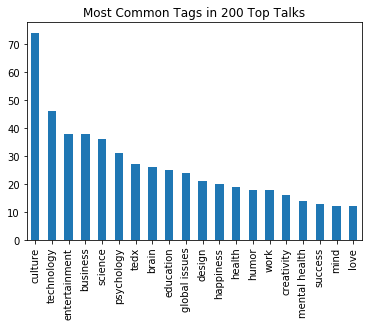

In [53]:
# Let's check common and rare words : 

freq_tags_200top = pd.Series(','.join(df_200top['tags']).split(',')).value_counts()
top_tags_200top = freq_tags_200top[:20]
print (top_tags_200top)
plt.title("Most Common Tags in 200 Top Talks")
top_tags_200top.plot.bar()

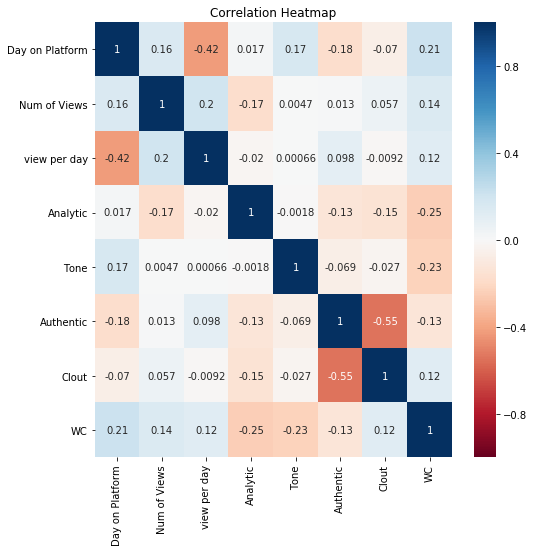

In [56]:
corr_data_200top = df_200top[['days_on_platform','views_as_of_06162017','view_per_day' , 'Analytic','Tone','Authentic','Clout','WC']]
corr = corr_data_200top.corr()

# plot the heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(corr,cmap="RdBu",annot=True,xticklabels=['Day on Platform','Num of Views','view per day','Analytic','Tone','Authentic','Clout','WC'], yticklabels=['Day on Platform','Num of Views','view per day','Analytic','Tone','Authentic','Clout','WC'],vmin=1,vmax=-1)
plt.title("Correlation Heatmap")
plt.show()

Text(0.5,1,'Boxplot of Main Summary Variables of 200 Top TedTalks')

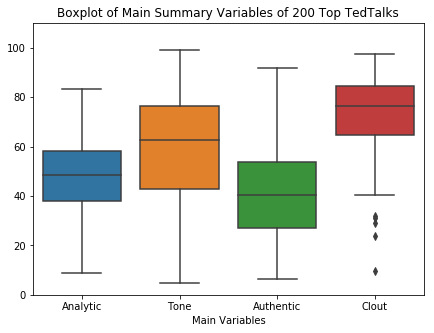

In [59]:
# Analyze 4 main summary features ("Analytic","Clout","Tone","Authentic")

plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_200top.loc[:,['Analytic','Tone','Authentic','Clout']]))
plt.ylabel("")
plt.xlabel("Main Variables")
plt.ylim(0,110)
plt.title("Boxplot of Main Summary Variables of 200 Top TedTalks")

## Group by year and Month

In [64]:
df.groupby('year_filmed')['Analytic','Tone','Authentic','Clout'].agg(['mean'])

,Analytic,Tone,Authentic,Clout
,mean,mean,mean,mean
year_filmed,,,,
1984,42.070000,54.900000,31.620000,73.530000
1990,58.070000,55.210000,43.080000,57.020000
1994,53.410000,43.100000,61.670000,66.770000
1998,51.923333,52.748333,48.966667,70.090000
2001,42.493333,63.536667,55.513333,48.856667
2002,55.209615,56.672308,41.005769,70.533077
2003,50.994857,58.686286,39.270571,72.133429
2004,53.312812,66.574375,36.802500,72.030625


In [65]:
df.groupby('month_filmed')['Analytic','Tone','Authentic','Clout'].agg(['mean'])

,Analytic,Tone,Authentic,Clout
,mean,mean,mean,mean
month_filmed,,,,
1,58.073214,41.947500,34.320000,74.425357
2,55.535833,56.221698,39.573915,73.042610
3,55.946182,53.108793,40.609187,72.613892
4,54.714874,51.247647,40.714370,73.923529
5,55.356471,56.867255,37.493137,74.028431
6,56.790974,52.962809,38.188577,75.766367
7,58.303083,52.193458,36.594333,74.860375
8,55.738387,56.548387,38.149355,74.112258


In [76]:
# 5 groups of time 


df_100days = df[df['days_on_platform']<=100].copy()
df_500days = df[(df['days_on_platform']<=500) & (df['days_on_platform']>100)].copy()
df_1000days = df[(df['days_on_platform']<=1000) & (df['days_on_platform']>500)].copy()
df_2000days = df[(df['days_on_platform']<=2000) & (df['days_on_platform']>1000)].copy()
df_4000days = df[(df['days_on_platform']>2000)].copy()


print (len(df_100days),len(df_500days),len(df_1000days),len(df_2000days),len(df_4000days))

72 270 305 691 1048


### Last 100 Days

society            38
humanity           33
communication      32
social change      27
tedx               23
technology         19
health             18
personal growth    18
leadership         17
education          16
children           16
science            15
community          15
future             14
identity           13
innovation         13
collaboration      13
global issues      12
inequality         12
health care        11
dtype: int64


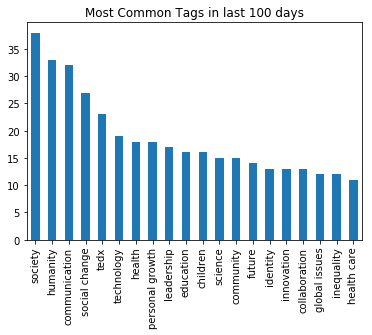

In [71]:
# Most Common days for last 100 days

freq_tags_100days = pd.Series(','.join(df_100days['tags']).split(',')).value_counts()
top_tags_100days = freq_tags_100days[:20]
print (top_tags_100days)
plt.title("Most Common Tags in last 100 days")
top_tags_100days.plot.bar()

society            9
humanity           8
social change      7
personal growth    7
technology         7
future             7
communication      6
love               4
collaboration      4
science            4
health             4
identity           3
innovation         3
education          3
community          3
aging              3
design             3
family             3
intelligence       3
music              3
dtype: int64


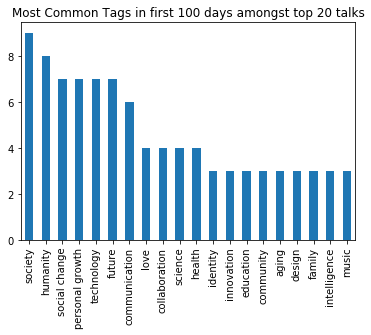

In [78]:
# top 20% Talks in the last 100 days (based on view_per_day)

df_100days_20top = df_100days.nlargest(20, 'view_per_day').copy()

freq_tags_100days_20top = pd.Series(','.join(df_100days_20top['tags']).split(',')).value_counts()
top_tags_100days_20top = freq_tags_100days_20top[:20]
print (top_tags_100days_20top)
plt.title("Most Common Tags in first 100 days amongst top 20 talks")
top_tags_100days_20top.plot.bar()

Text(0.5,1,'Boxplot of Main Summary Variables of Last 100 days top 20 TedTalks')

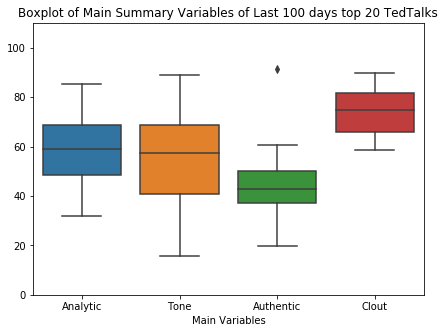

In [98]:
# Analyze 4 main summary features ("Analytic","Clout","Tone","Authentic")

plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_100days_20top.loc[:,['Analytic','Tone','Authentic','Clout']]))
plt.ylabel("")
plt.xlabel("Main Variables")
plt.ylim(0,110)
plt.title("Boxplot of Main Summary Variables of Last 100 days top 20 TedTalks")

### Last 500 to 100 days

society            105
innovation          83
humanity            80
communication       76
technology          74
future              69
social change       69
science             64
identity            63
collaboration       63
community           63
tedx                58
leadership          53
potential           49
global issues       48
big problems        40
personal growth     39
activism            39
motivation          38
design              38
dtype: int64


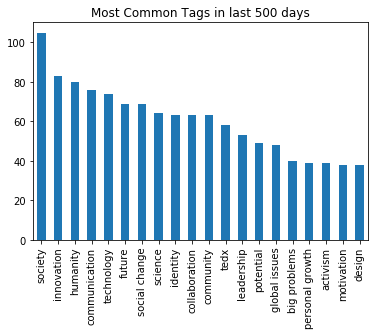

In [72]:
# Most Common days for last 100 to 500 days

freq_tags_500days = pd.Series(','.join(df_500days['tags']).split(',')).value_counts()
top_tags_500days = freq_tags_500days[:20]
print (top_tags_500days)
plt.title("Most Common Tags in 100 to 500 days")
top_tags_500days.plot.bar()

society            24
communication      22
humanity           18
tedx               17
personal growth    17
innovation         15
leadership         14
motivation         14
identity           12
collaboration      12
technology         10
social change      10
science            10
community           9
future              8
education           8
activism            8
engineering         8
teaching            7
brain               7
dtype: int64


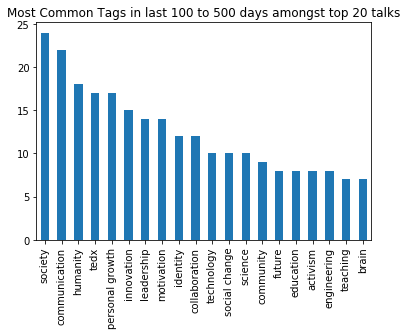

In [79]:
# top 20% Talks in the last 500 to 100  days (based on view_per_day)

df_500days_20top = df_500days.nlargest(50, 'view_per_day').copy()

freq_tags_500days_20top = pd.Series(','.join(df_500days_20top['tags']).split(',')).value_counts()
top_tags_500days_20top = freq_tags_500days_20top[:20]
print (top_tags_500days_20top)
plt.title("Most Common Tags in last 100 to 500 days amongst top 20 talks")
top_tags_500days_20top.plot.bar()

Text(0.5,1,'Boxplot of Main Summary Variables of Last 500 to 100 days top 20 TedTalks')

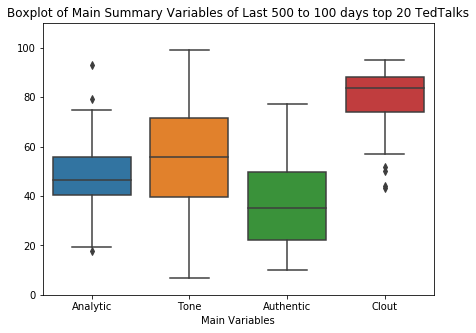

In [99]:
# Analyze 4 main summary features ("Analytic","Clout","Tone","Authentic")

plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_500days_20top.loc[:,['Analytic','Tone','Authentic','Clout']]))
plt.ylabel("")
plt.xlabel("Main Variables")
plt.ylim(0,110)
plt.title("Boxplot of Main Summary Variables of Last 500 to 100 days top 20 TedTalks")

### 500 to 1000 Days 

technology       60
ted fellows      46
tedx             45
global issues    43
science          41
health           36
design           30
innovation       29
creativity       27
women            26
future           25
activism         25
medicine         23
social change    23
business         22
art              22
communication    21
society          20
education        20
biology          20
dtype: int64


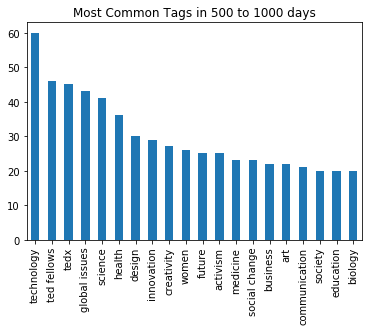

In [73]:
# Most Common days for 500 to 1000 days

freq_tags_1000days = pd.Series(','.join(df_1000days['tags']).split(',')).value_counts()
top_tags_1000days = freq_tags_1000days[:20]
print (top_tags_1000days)
plt.title("Most Common Tags in 500 to 1000 days")
top_tags_1000days.plot.bar()

tedx                 13
technology           10
brain                10
neuroscience          9
science               9
health                9
business              8
life                  7
biology               6
design                6
cognitive science     6
innovation            6
education             6
psychology            6
mind                  6
creativity            6
humanity              6
mental health         6
work                  6
future                5
dtype: int64


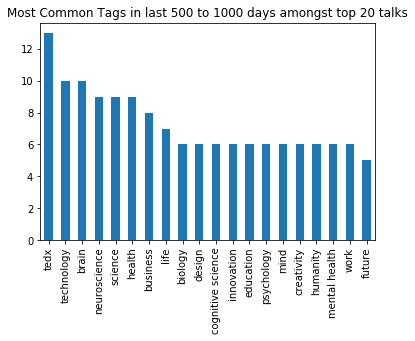

In [80]:
# top 20% Talks in the last 500 to 1000  days (based on view_per_day)

df_1000days_20top = df_1000days.nlargest(50, 'view_per_day').copy()

freq_tags_1000days_20top = pd.Series(','.join(df_1000days_20top['tags']).split(',')).value_counts()
top_tags_1000days_20top = freq_tags_1000days_20top[:20]
print (top_tags_1000days_20top)
plt.title("Most Common Tags in last 500 to 1000 days amongst top 20 talks")
top_tags_1000days_20top.plot.bar()

Text(0.5,1,'Boxplot of Main Summary Variables of Last 1000 to 500 days top 20 TedTalks')

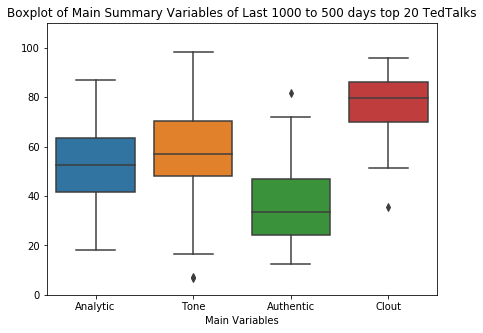

In [100]:
# Analyze 4 main summary features ("Analytic","Clout","Tone","Authentic")

plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_1000days_20top.loc[:,['Analytic','Tone','Authentic','Clout']]))
plt.ylabel("")
plt.xlabel("Main Variables")
plt.ylim(0,110)
plt.title("Boxplot of Main Summary Variables of Last 1000 to 500 days top 20 TedTalks")

### 1000 to 2000 days

tedx             181
technology       170
culture          132
global issues    122
science          119
business          77
design            74
health            66
biology           60
entertainment     57
art               53
innovation        51
ted fellows       45
brain             43
politics          43
health care       43
medicine          41
creativity        40
education         39
neuroscience      38
dtype: int64


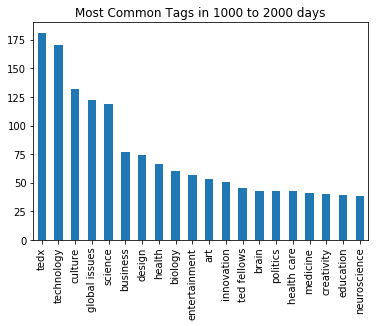

In [74]:
# Most Common days for last 1000 to 2000 days

freq_tags_2000days = pd.Series(','.join(df_2000days['tags']).split(',')).value_counts()
top_tags_2000days = freq_tags_2000days[:20]
print (top_tags_2000days)
plt.title("Most Common Tags in 1000 to 2000 days")
top_tags_2000days.plot.bar()

culture          20
entertainment    10
business          8
health            7
psychology        7
technology        6
tedx              6
performance       5
live music        4
happiness         4
brain             4
mind              4
body language     4
work              4
depression        4
music             4
comedy            4
mental health     4
education         4
motivation        4
dtype: int64


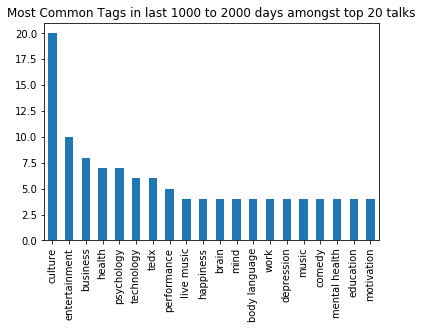

In [82]:
# top 20% Talks in the last 1000 to 2000  days (based on view_per_day)

df_2000days_20top = df_2000days.nlargest(50, 'view_per_day').copy()

freq_tags_2000days_20top = pd.Series(','.join(df_2000days_20top['tags']).split(',')).value_counts()
top_tags_2000days_20top = freq_tags_2000days_20top[:20]
print (top_tags_2000days_20top)
plt.title("Most Common Tags in last 1000 to 2000 days amongst top 20 talks")
top_tags_2000days_20top.plot.bar()

Text(0.5,1,'Boxplot of Main Summary Variables of Last 1000 to 2000 days top 20 TedTalks')

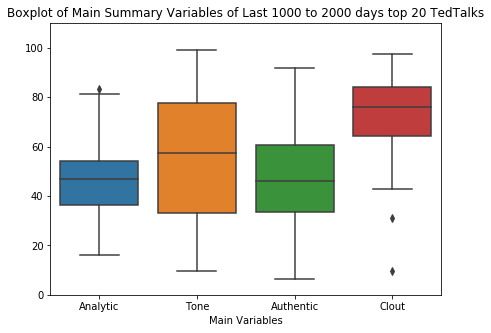

In [101]:
# Analyze 4 main summary features ("Analytic","Clout","Tone","Authentic")

plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_2000days_20top.loc[:,['Analytic','Tone','Authentic','Clout']]))
plt.ylabel("")
plt.xlabel("Main Variables")
plt.ylim(0,110)
plt.title("Boxplot of Main Summary Variables of Last 1000 to 2000 days top 20% TedTalks")

### 2000 to 4000 Days

technology       369
culture          301
science          281
global issues    258
design           251
entertainment    202
business         187
education         99
politics          98
art               96
tedx              91
creativity        77
music             72
health            71
biology           70
economics         68
invention         65
brain             63
storytelling      62
environment       62
dtype: int64


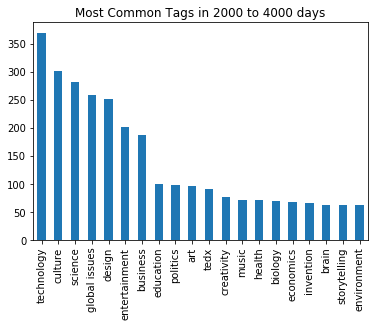

In [75]:
# Most Common days for last 2000 to 4000 days

freq_tags_4000days = pd.Series(','.join(df_4000days['tags']).split(',')).value_counts()
top_tags_4000days = freq_tags_4000days[:20]
print (top_tags_4000days)
plt.title("Most Common Tags in 2000 to 4000 days")
top_tags_4000days.plot.bar()

culture           23
entertainment     13
science           11
education         11
business          11
technology        10
psychology         9
design             7
global issues      7
creativity         7
brain              6
work               5
happiness          5
success            5
evolution          4
storytelling       4
leadership         4
visualizations     4
magic              4
tedx               4
dtype: int64


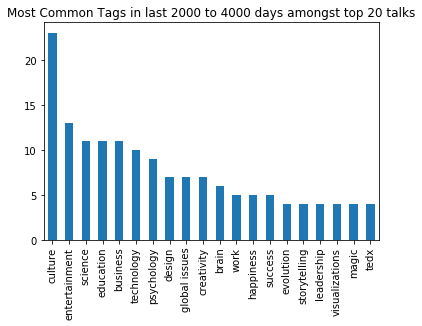

In [83]:
# top 20% Talks in the last 2000 to 4000  days (based on view_per_day)

df_4000days_20top = df_4000days.nlargest(50, 'view_per_day').copy()

freq_tags_4000days_20top = pd.Series(','.join(df_4000days_20top['tags']).split(',')).value_counts()
top_tags_4000days_20top = freq_tags_4000days_20top[:20]
print (top_tags_4000days_20top)
plt.title("Most Common Tags in last 2000 to 4000 days amongst top 20% talks")
top_tags_4000days_20top.plot.bar()

Text(0.5,1,'Boxplot of Main Summary Variables of Last 2000 to 4000 days top 20% TedTalks')

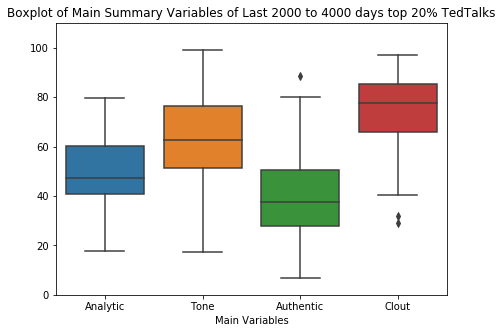

In [102]:
# Analyze 4 main summary features ("Analytic","Clout","Tone","Authentic")

plt.figure(figsize=(7, 5))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_4000days_20top.loc[:,['Analytic','Tone','Authentic','Clout']]))
plt.ylabel("")
plt.xlabel("Main Variables")
plt.ylim(0,110)
plt.title("Boxplot of Main Summary Variables of Last 2000 to 4000 days top 20% TedTalks")

### Duration 

In [84]:
df['duration'].describe()

count    2386.000000
mean      823.878458
std       336.791926
min       135.000000
25%       579.250000
50%       856.000000
75%      1053.000000
max      3608.000000
Name: duration, dtype: float64

Text(0.5,1,'Boxplot of all talks duration')

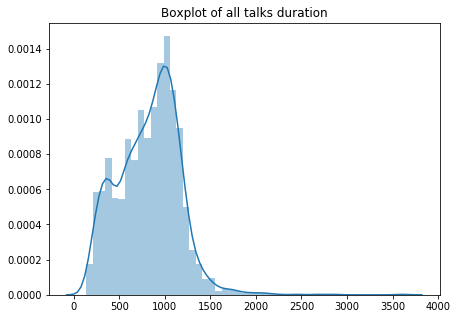

In [92]:
# Duration amongst all ted talks

plt.figure(figsize=(7, 5))

sns.distplot(df['duration'])
plt.ylabel("")
plt.xlabel("")
#plt.ylim(0,110)
plt.title("Boxplot of all talks duration")

Text(0.5,1,'Boxplot of first 100 days top 20 talks duration')

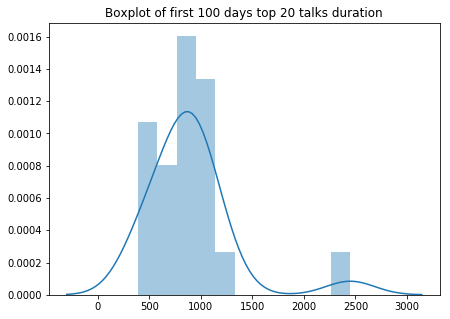

In [91]:
# Duration amongst top 20 percent in different time frames

plt.figure(figsize=(7, 5))

sns.distplot(df_100days_20top['duration'])
plt.xlabel("Duration (seconds)")
plt.title("Boxplot of first 100 days top 20 talks duration")

Text(0.5,1,'Boxplot of first 100 to 500 days top 20% talks duration')

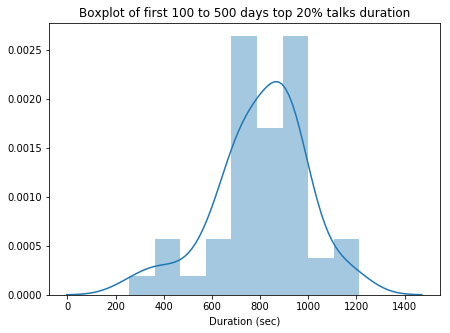

In [93]:
plt.figure(figsize=(7, 5))

sns.distplot(df_500days_20top['duration'])
plt.xlabel("Duration (sec)")
plt.title("Boxplot of first 100 to 500 days top 20% talks duration")

Text(0.5,1,'Boxplot of first 500 to 1000 days top 20% talks duration')

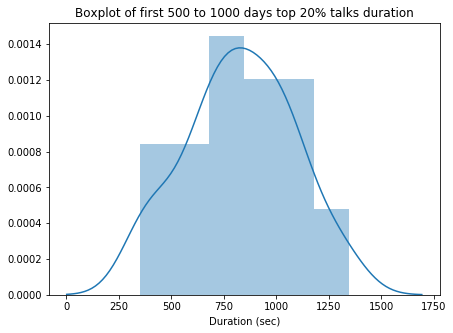

In [95]:
plt.figure(figsize=(7, 5))

sns.distplot(df_1000days_20top['duration'])
plt.xlabel("Duration (sec)")
plt.title("Boxplot of first 500 to 1000 days top 20% talks duration")

Text(0.5,1,'Boxplot of first 1000 to 2000 days top 20% talks duration')

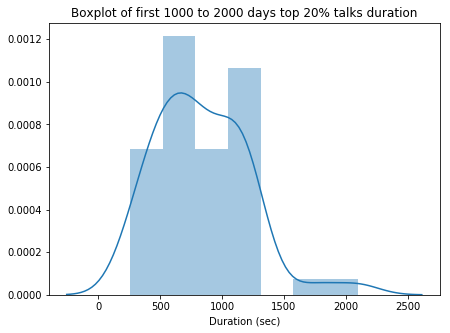

In [96]:
plt.figure(figsize=(7, 5))

sns.distplot(df_2000days_20top['duration'])
plt.xlabel("Duration (sec)")
plt.title("Boxplot of first 1000 to 2000 days top 20% talks duration")

Text(0.5,1,'Boxplot of first 2000 to 4000 days top 20% talks duration')

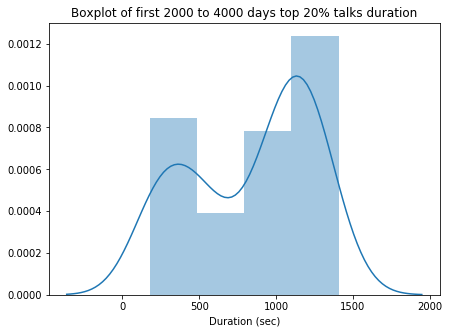

In [97]:
plt.figure(figsize=(7, 5))

sns.distplot(df_4000days_20top['duration'])
plt.xlabel("Duration (sec)")
plt.title("Boxplot of first 2000 to 4000 days top 20% talks duration")

# Add new column to as "tag_word_list" (list of words of tags), also I modified the original 'text' column by removing puncuations and lowercasing. 

df['tag_word_list'] = df['tag_word_list'].apply(lambda x : " ".join(word for word in x.translate(str.maketrans('','',string.punctuation)).lower().split()))
df_review_restaurant_eng.loc[:,'word_list'] = np.nan
df_review_restaurant_eng['word_list'] = df_review_restaurant_eng['text'].apply(lambda x : [word for word in x.split()])